# Yulu Casestudy


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel,ttest_1samp,mannwhitneyu
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway,kruskal,shapiro,levene,kstest
from scipy.stats import ttest_ind,ttest_rel,ttest_1samp
from scipy.stats import pearsonr,spearmanr,probplot
from statsmodels.formula.api import ols


In [2]:
df=pd.read_csv('bike_sharing.csv')

In [3]:
dfs=df.copy()
dfs.shape

(10886, 12)

In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
dfs.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
dfs.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
dfs['date']=pd.to_datetime(dfs['datetime']).dt.date

In [8]:
dfs.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01


In [9]:
dfs['month']=pd.to_datetime(dfs['datetime']).dt.month
dfs['day']=pd.to_datetime(dfs['datetime']).dt.strftime("%A")
dfs['year']=pd.to_datetime(dfs['datetime']).dt.year
dfs['hour'] = pd.to_datetime(dfs['datetime']).dt.hour


In [10]:
dfs['month']=dfs['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [11]:
dfs.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,day,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,Jan,Saturday,2011,0


In [12]:
dfs.skew(numeric_only = True)

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
year         -0.007717
hour         -0.009125
dtype: float64

# **Skewness**
Variables **temp**, **season** and **humidity** are close to zero hence we can consider them to have no skew.

Vatiables **Holiday**,**weather**,**windspeed**,**casual**,**registered** and **count** demostrate **positive** skewness and Variables **woringday**,**atemp** exhibit **negative** skew.

In [13]:
dfs[dfs.duplicated()] #no duplicates

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,day,year,hour


## Checking for Missing values or nulls

In [14]:
dfs.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
month         0
day           0
year          0
hour          0
dtype: int64

No Null values in any column

In [15]:
dfs['season']= dfs['season'].map(str)
season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
dfs["season"] = dfs["season"].map(lambda x: season_mapping[x])


dfs['holiday']= dfs['holiday'].map(str)
holiday_mapping = {'0':'no', '1':'yes'}
dfs["holiday"] = dfs["holiday"].map(lambda x: holiday_mapping[x])

dfs['workingday']= dfs['workingday'].map(str)
working_day_mapping = {'0':'no', '1':'yes'}
dfs["workingday"] = dfs["workingday"].map(lambda x: working_day_mapping[x])

In [16]:
dfs.head(9)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,day,year,hour
0,2011-01-01 00:00:00,spring,no,no,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,Jan,Saturday,2011,0
1,2011-01-01 01:00:00,spring,no,no,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,Jan,Saturday,2011,1
2,2011-01-01 02:00:00,spring,no,no,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,Jan,Saturday,2011,2
3,2011-01-01 03:00:00,spring,no,no,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,Jan,Saturday,2011,3
4,2011-01-01 04:00:00,spring,no,no,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,Jan,Saturday,2011,4
5,2011-01-01 05:00:00,spring,no,no,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,Jan,Saturday,2011,5
6,2011-01-01 06:00:00,spring,no,no,1,9.02,13.635,80,0.0000,2,0,2,2011-01-01,Jan,Saturday,2011,6
7,2011-01-01 07:00:00,spring,no,no,1,8.20,12.880,86,0.0000,1,2,3,2011-01-01,Jan,Saturday,2011,7
8,2011-01-01 08:00:00,spring,no,no,1,9.84,14.395,75,0.0000,1,7,8,2011-01-01,Jan,Saturday,2011,8


# Changing Data type of categorical Variables

In [17]:
lst=['season','holiday','workingday','weather','day','month']
for _ in lst:
    dfs[_] = dfs[_].astype('category')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  month       10886 non-null  category
 14  day         10886 non-null  category
 15  year        10886 non-null  int32   
 16  hour        10886 non-null  int32   
dtypes: category(6), float64(3), int32(2), int64(4), object(2)
memory usage: 915.8+ KB


# EDA/Non Graphical Analysis

In [18]:
print(f"Time period and shape of data is {pd.to_datetime(dfs['datetime']).max()-pd.to_datetime(dfs['datetime']).min()} and {dfs.shape}")

Time period and shape of data is 718 days 23:00:00 and (10886, 17)


In [19]:
for _ in dfs.columns:
    if dfs[_].dtype=='category':
        display(dfs[_].value_counts().to_frame().reset_index())

,season,count
0,winter,2734
1,fall,2733
2,summer,2733
3,spring,2686


,holiday,count
0,no,10575
1,yes,311


,workingday,count
0,yes,7412
1,no,3474


,weather,count
0,1,7192
1,2,2834
2,3,859
3,4,1


,month,count
0,Aug,912
1,Dec,912
2,Jul,912
3,Jun,912
4,May,912
5,Nov,911
6,Oct,911
7,Apr,909
8,Sep,909
9,Feb,901


,day,count
0,Saturday,1584
1,Sunday,1579
2,Thursday,1553
3,Monday,1551
4,Wednesday,1551
5,Tuesday,1539
6,Friday,1529


Let try establishing relation between dependent and independent variables.

In [20]:
dfs_season=dfs.groupby('season')['count'].sum().reset_index()
dfs_holiday=dfs.groupby('holiday')['count'].sum().reset_index()
dfs_workingday=dfs.groupby('workingday')['count'].sum().reset_index()
dfs_weather=dfs.groupby('weather')['count'].sum().reset_index()
dfs_weather
dfs.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,day,year,hour
0,2011-01-01 00:00:00,spring,no,no,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,Jan,Saturday,2011,0


# Bivarient Analysis

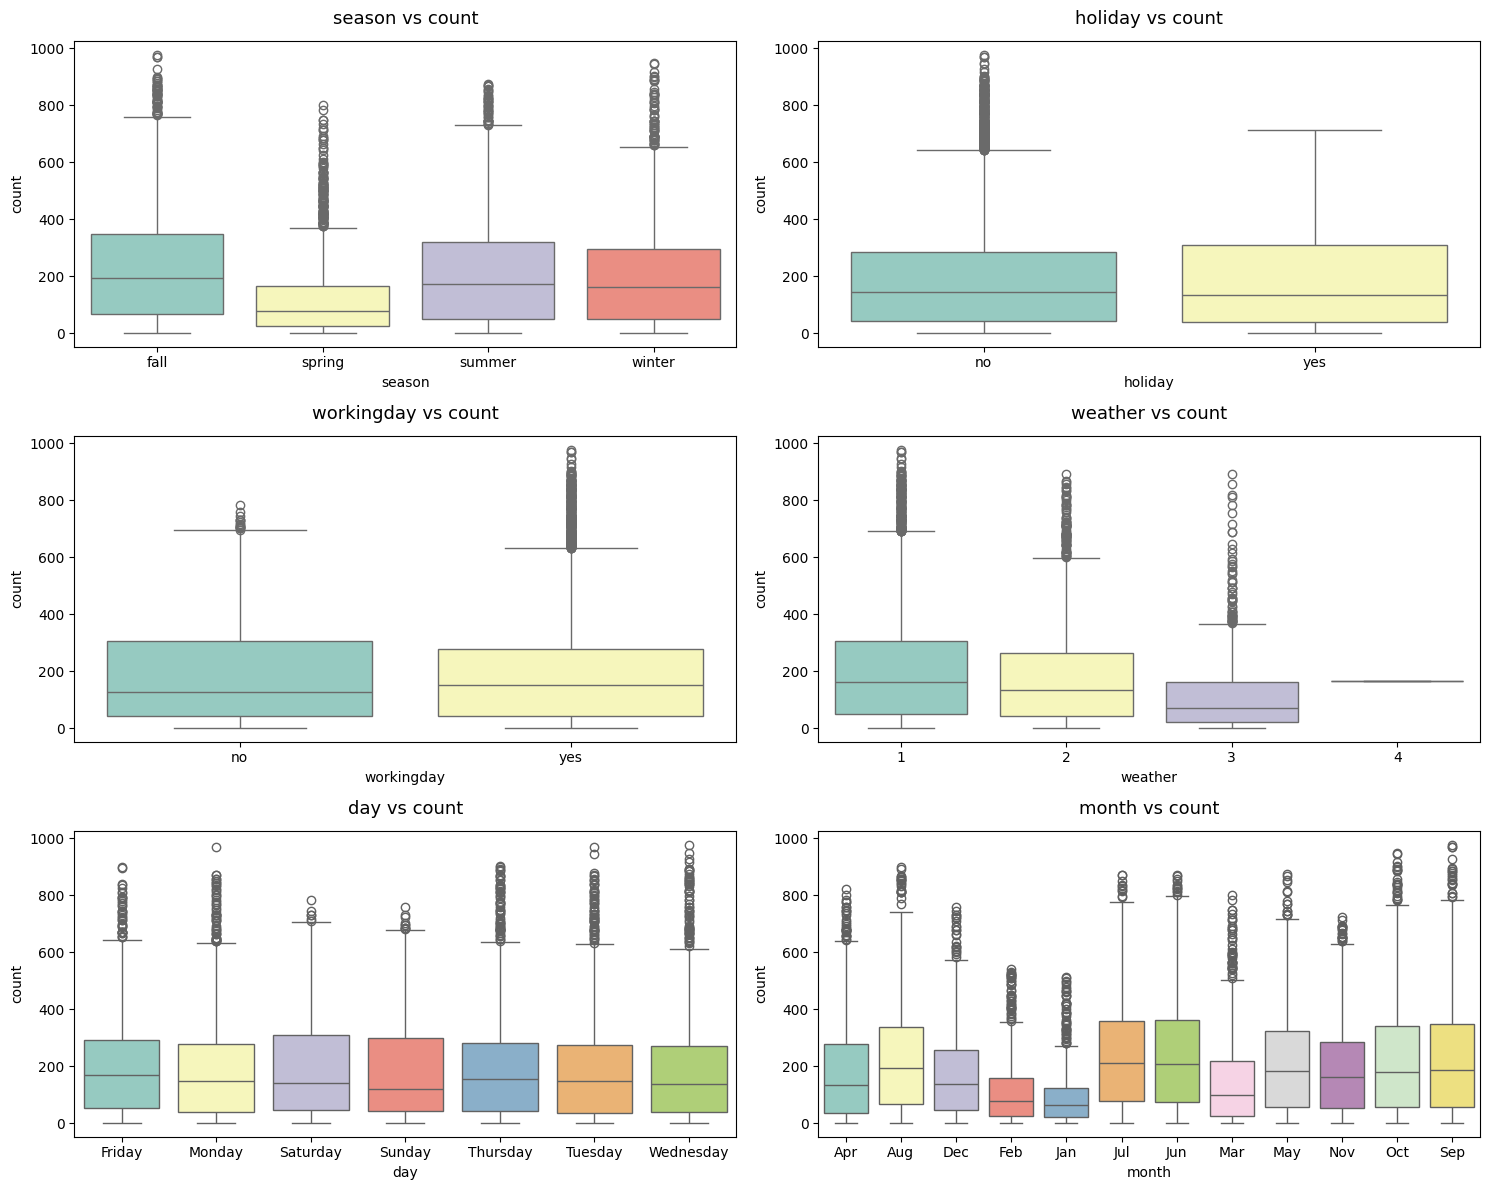

In [21]:
lst=['season','holiday','workingday','weather','day','month']
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(15,12))
for i,col in enumerate(lst):
    sns.boxplot(data=dfs,x=col,y='count',ax=axes[i//2,i%2],palette='Set3',patch_artist=True)
    axes[i//2,i%2].set_title(f"{col} vs count", pad=12,fontsize=13)

plt.tight_layout()
plt.show()


<Axes: xlabel='day', ylabel='count'>

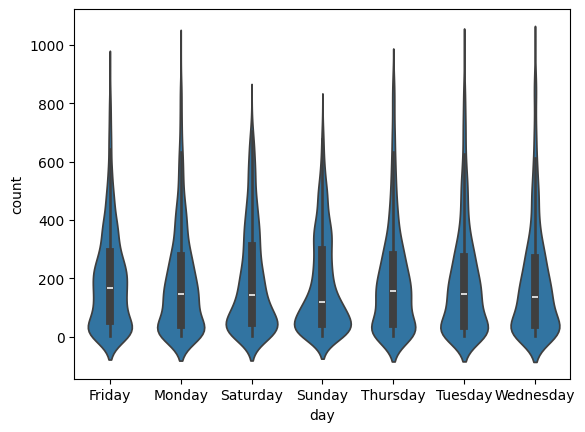

In [22]:
sns.violinplot(x='day', y='count', data=dfs)

**Observations from boxplot**
1) Season vs Count: Season spring has the lowest median count than rest of the seasons and seasons summer and fall has most number of bike rentals from the boxplot.Winste season comes close to the medians of summer and fall but is lower than them even in case on min max values.

2) Holiday vs Count:medians of the both non holday and holiday days comes very close but the max value of holiday days is more than non holiday overall, there are handfull of odd days where we had rentals execeeding holdiay's max count for rentals ocassionally but holiday days has more varience.

3)Working day vs Count: Median of neigther workingday not holiday(1) is higher sightly than a woringday(0) but the max value of the working day is higher than "1".And we can see variance a little higher in case of workingday(0).

4)Weather vs Count: There is a dractical effect of Rain over the rentals, we can least rentals happen in case of weather especially when there is Heavy Rain or Ice Pallets or Thunderstorm or Mist, Snow or Fog which can be observed from the boxplot of category 4. the second most conserning sacpet in weather is category 3(Light Snow, Light Rain or Thunderstorm or Scattered clouds, Light Rain or Scattered clouds) where median,max values are lowest than rest of the categories 1,2.

**Key Differentiating factor from the above box plot is weather from above observation**

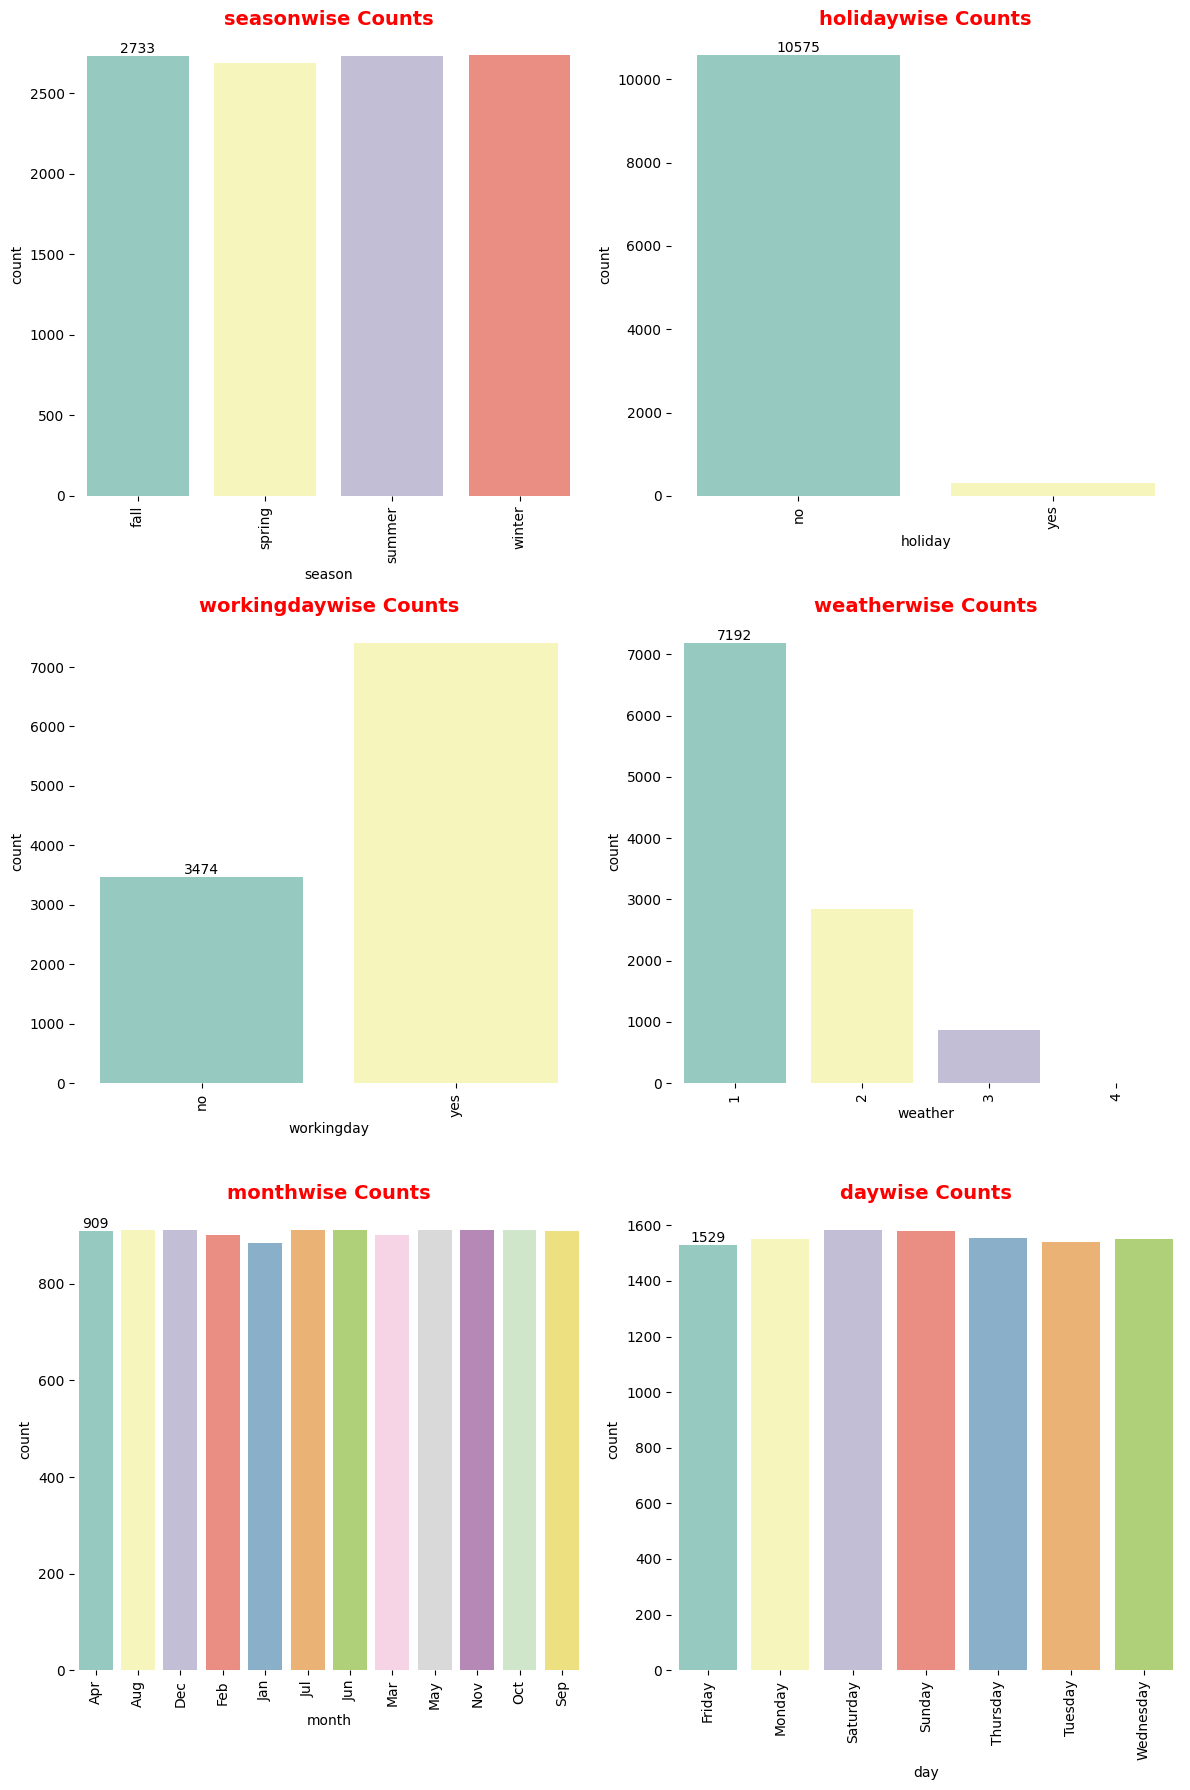

In [23]:
plt.figure(figsize=(12,18))
plt.style.use('default')
plt.style.use('fast')

i=1
for _ in dfs.columns:
    if dfs[_].dtype=='category':
        plt.subplot(3,2,i)
        a=sns.countplot(data=dfs, x=dfs[_],palette='Set3')
        plt.title(f'{_}wise Counts',fontsize=14,fontweight='bold',color='r')
        a.bar_label(a.containers[0], label_type='edge')
        sns.despine(left=True,bottom=True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        i+=1

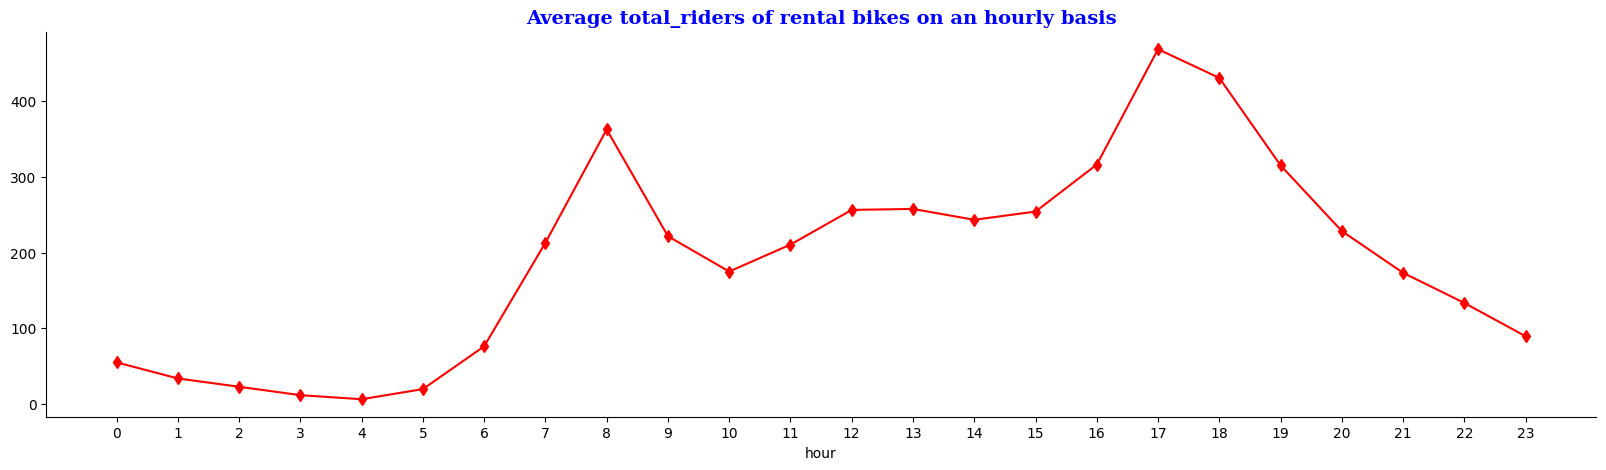

In [24]:
plt.figure(figsize = (20,5))
plt.title("Average total_riders of rental bikes on an hourly basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',color='b')
dfs.groupby('hour')['count'].mean().plot(kind = 'line', marker = 'd',color='r')
plt.xticks(np.arange(0, 24))
sns.despine()
plt.show()

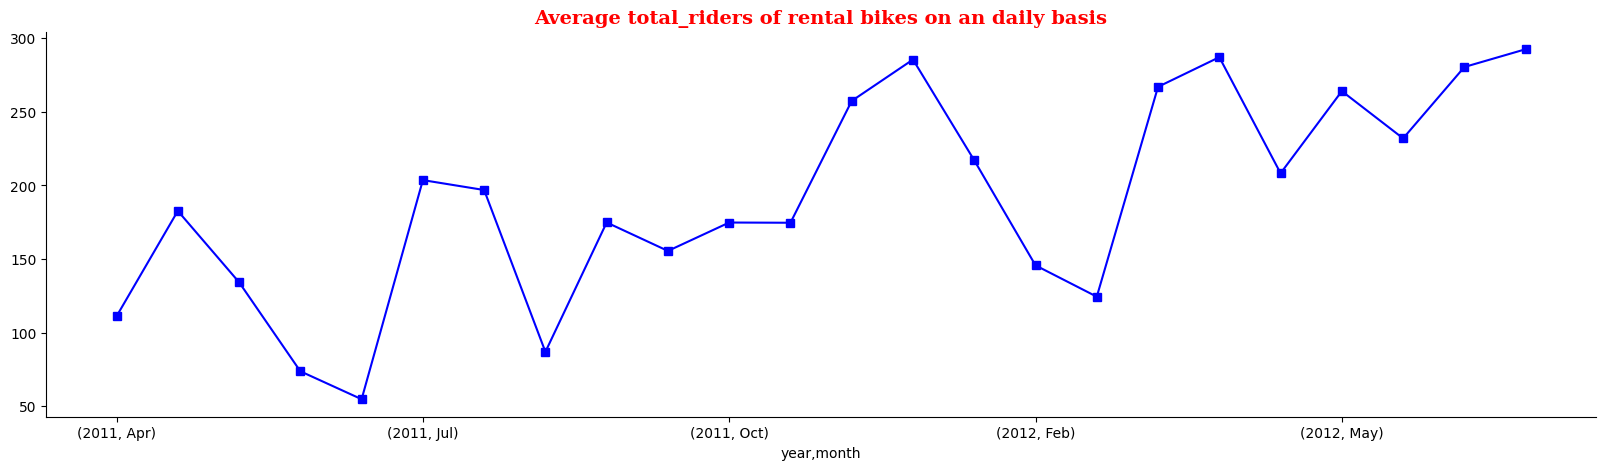

In [25]:
plt.figure(figsize = (20,5))
plt.title("Average total_riders of rental bikes on an daily basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',color='r')
dfs.groupby(['year','month'])['count'].mean().plot(kind = 'line', marker = 's',color='b')
sns.despine()
plt.show()

**Insights from above count and line graphs**


1.   The line plot indicate that there is a distinct fluctuation in total_riders throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
2.   The count plots indicate that there is a distinct fluctuation in count throughout the month,yearwise but gradually increasing the count of total_riders



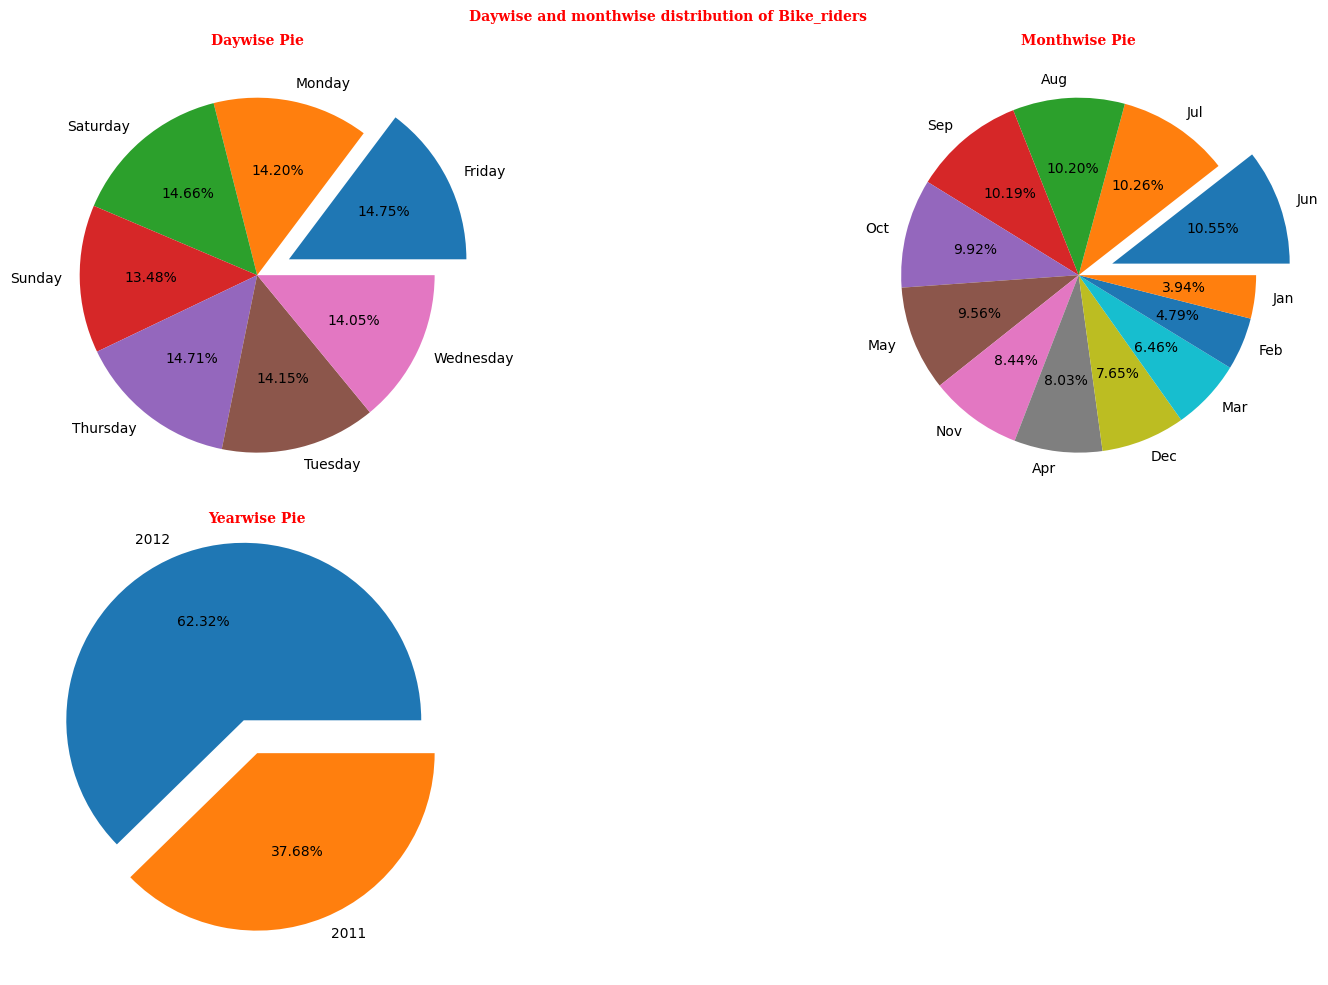

In [26]:
day_cnt=dfs.groupby('day')['count'].mean().to_frame().reset_index()
month_cnt = dfs.groupby('month')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
year_cnt = dfs.groupby('year')['count'].mean().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(18,10))
plt.suptitle('Daywise and monthwise distribution of Bike_riders',fontsize=10,fontfamily='serif',fontweight='bold',color='r')


plt.subplot(221)
plt.pie(data=day_cnt, x=day_cnt['count'],labels=day_cnt['day'],
        explode=(0.2,0,0,0,0,0,0), autopct='%0.2f%%')
plt.title('Daywise Pie',fontsize=10,fontfamily='serif',fontweight='bold',color='r')

plt.subplot(222)
plt.pie(data=month_cnt, x=month_cnt['count'],labels=month_cnt['month'],
        explode=(0.2,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')
plt.title('Monthwise Pie',fontsize=10,fontfamily='serif',fontweight='bold',color='r')

plt.subplot(223)
plt.pie(data=year_cnt, x=year_cnt['count'],labels=year_cnt['year'],
        explode=(0.2,0), autopct='%0.2f%%')
plt.title('Yearwise Pie',fontsize=10,fontfamily='serif',fontweight='bold',color='r')
plt.tight_layout()
plt.show()

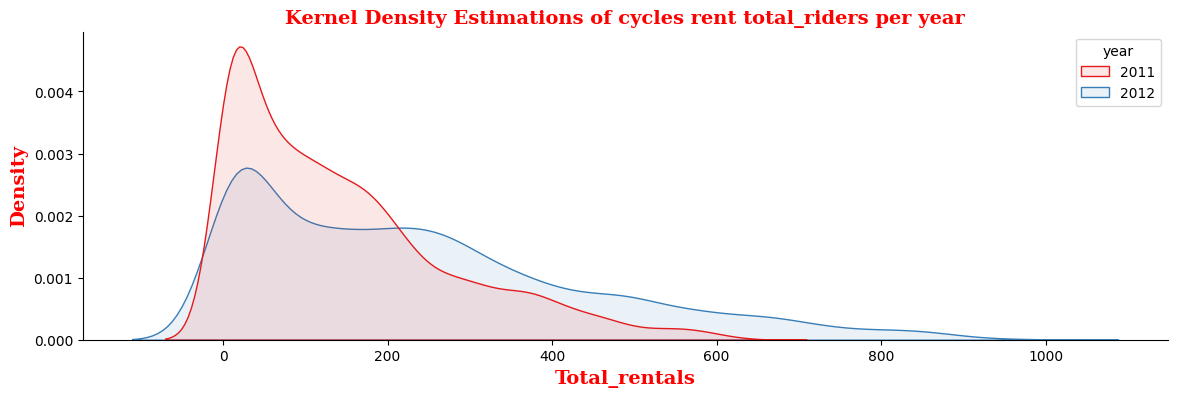

In [27]:
plt.figure(figsize = (14,4))
sns.kdeplot(data=dfs, x="count", hue="year", fill=True, common_norm=False,  palette='Set1', alpha=.1, linewidth=1)
plt.title("Kernel Density Estimations of cycles rent total_riders per year",fontsize = 14,fontfamily='serif',fontweight='bold',color='r')
plt.xlabel("Total_rentals",fontsize = 14,fontfamily='serif',fontweight='bold',color='r')
plt.ylabel("Density",fontsize = 14,fontfamily='serif',fontweight='bold',color='r')
sns.despine()
plt.show()

**Insights from pir charts and KDE plots**


1.   Daywise Friday has most no of rental and sunday has the least,Months wse Quater 1 (Jan,Feb,Mar) has least number of rentals,Year on year growth is approximatly 20%.
2.   No of the rentals less than 200 has significantly decresed in 2012 despite increase in overall growth in the no of rentals.



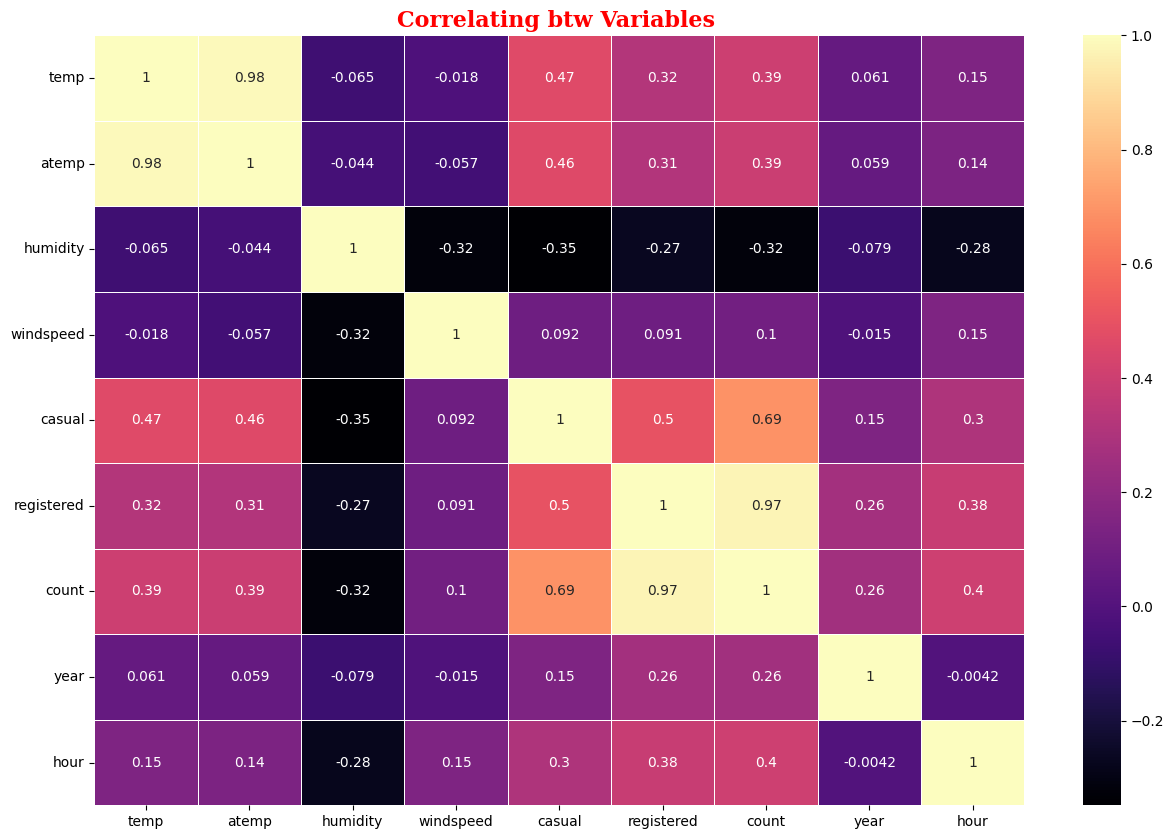

In [28]:

plt.figure(figsize=(15,10))
sns.heatmap(dfs.corr(numeric_only=True), annot=True, linewidth=.5,cmap='magma')
plt.yticks(rotation=0)
plt.title('Correlating btw Variables ',fontfamily='serif',fontweight='bold',fontsize=16,color='r')
plt.show()

**Insights from Heat map**


1.   Humidity has a ngative correlation with regsitered, Casual and overall users which can be a factor that alter the course of rentals.
2.   Temp and atemp are weakly corelated with overal count which may also have some effect on rentals.
3.    Windspeed has no correlation with overall rentals so this feature might not be of much importance.






# Normality check Visually

In [29]:
import statsmodels.api as sm
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  month       10886 non-null  category
 14  day         10886 non-null  category
 15  year        10886 non-null  int32   
 16  hour        10886 non-null  int32   
dtypes: category(6), float64(3), int32(2), int64(4), object(2)
memory usage: 915.8+ KB


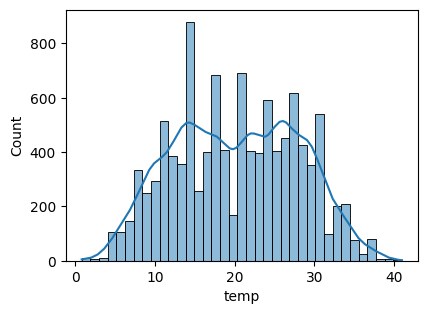

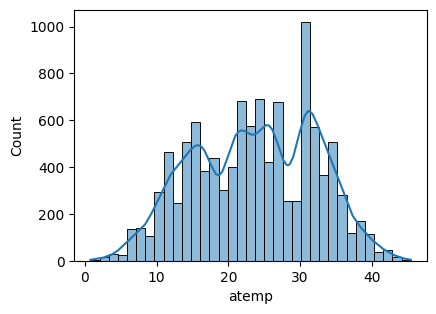

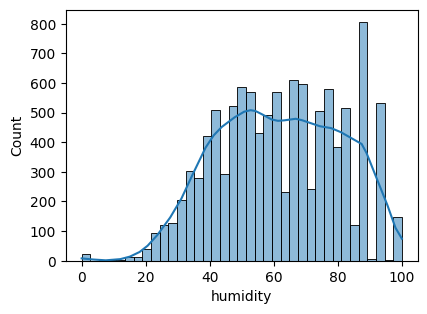

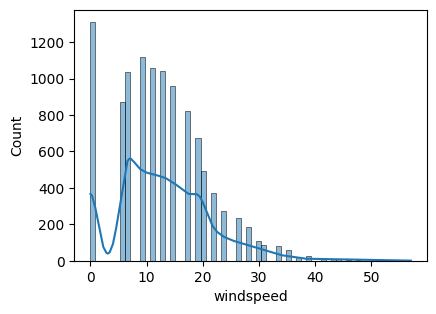

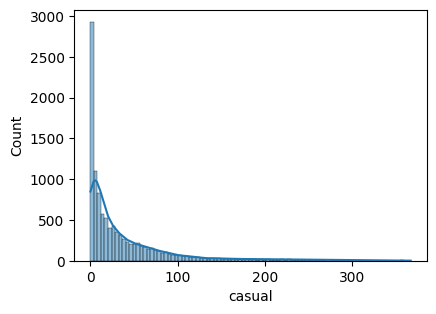

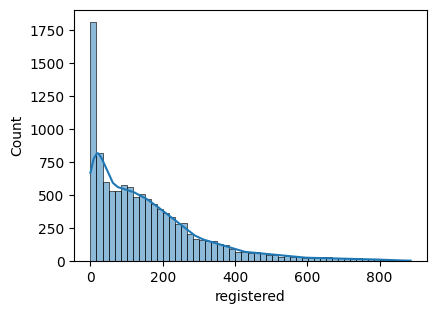

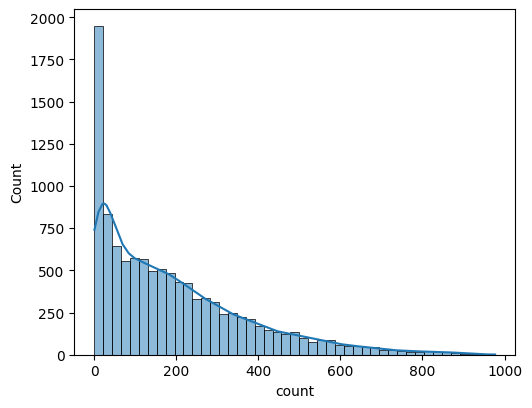

In [30]:
lst=['temp','atemp','humidity','windspeed','casual','registered','count']
j=1
for _ in lst:
  plt.figure(figsize=(10,15))
  plt.title(f"{_} Distribution")
  plt.subplot(4,2,j)
  sns.histplot(dfs[_], kde=True)
  j+=1
plt.tight_layout()


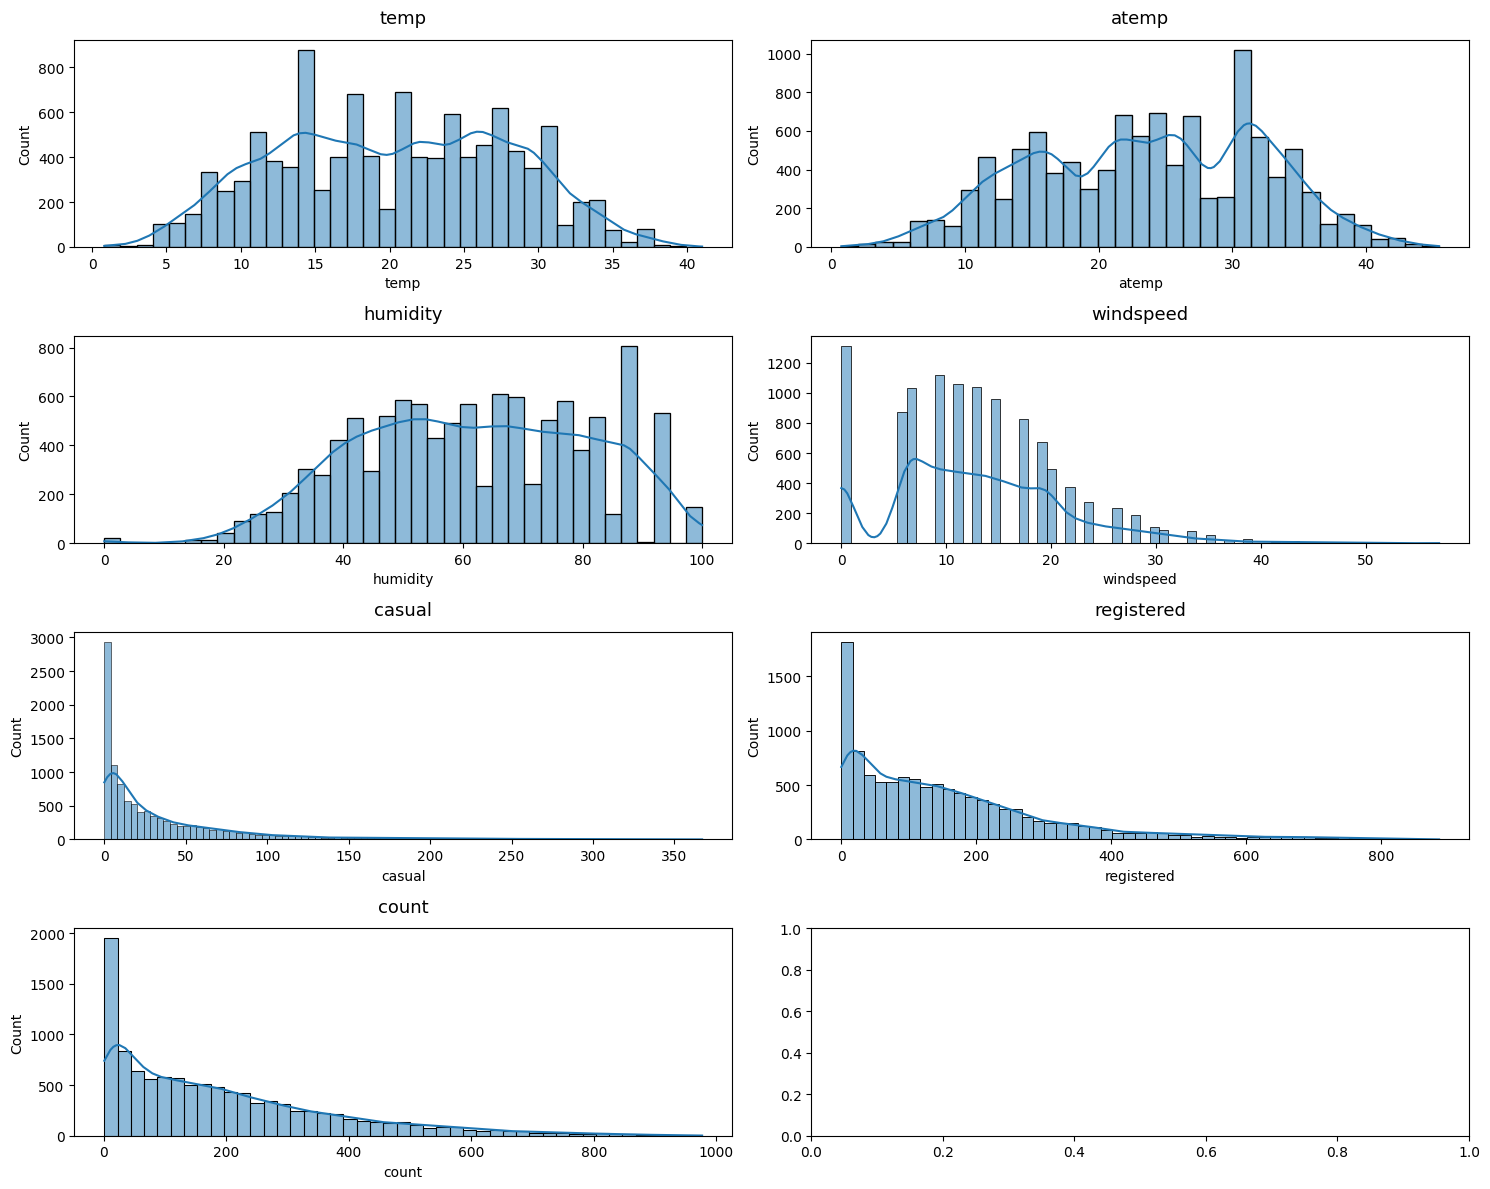

In [31]:
lst1=['temp','atemp','humidity','windspeed','casual','registered','count']
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,12))
for i,col in enumerate(lst1):
    sns.histplot(dfs[col], kde=True,ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f"{col}", pad=12,fontsize=13)

plt.tight_layout()
plt.show()


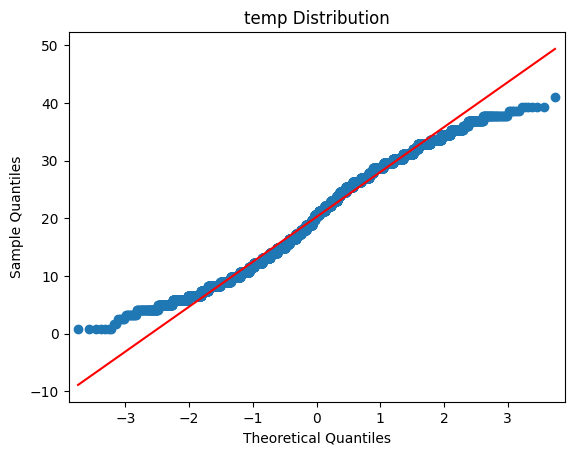

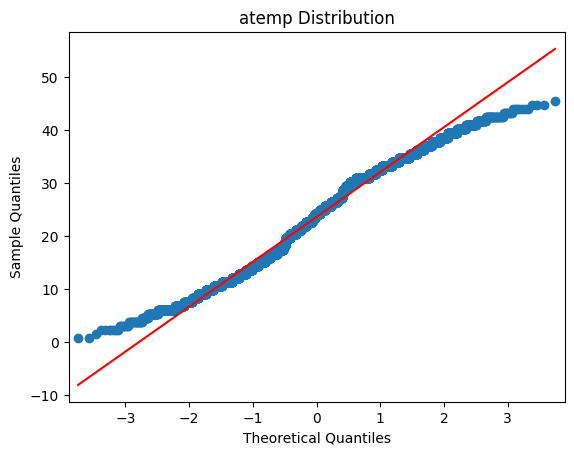

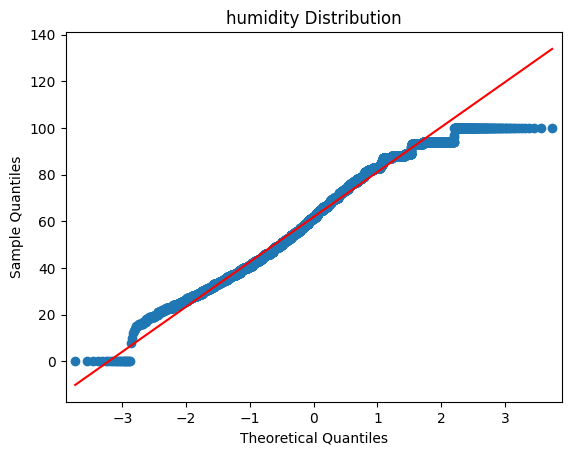

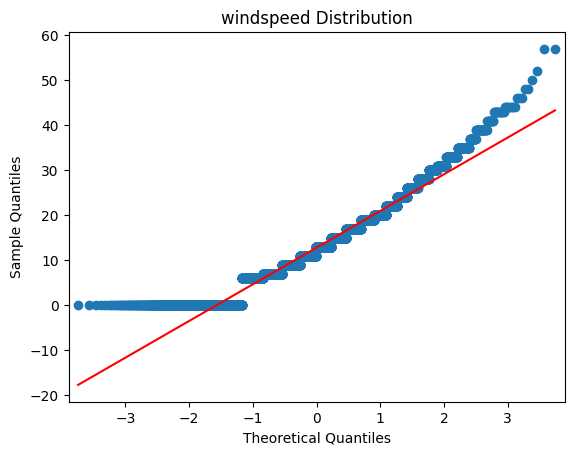

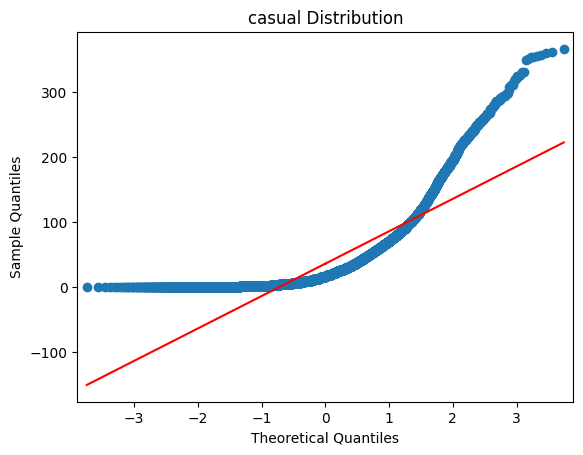

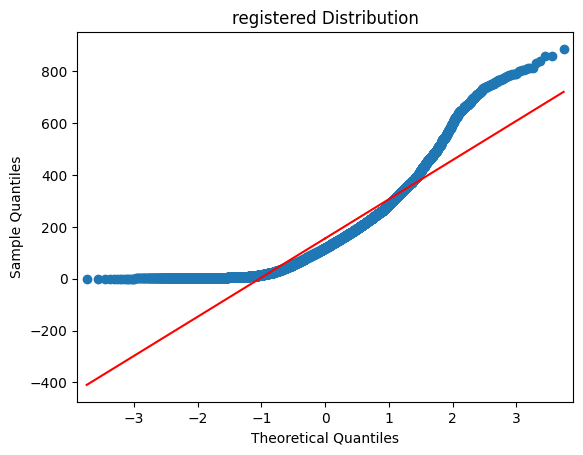

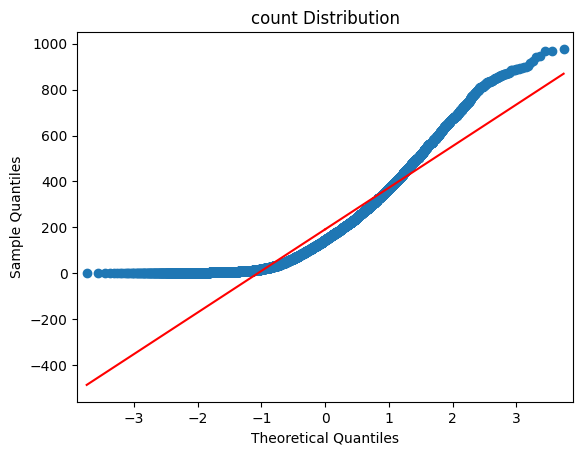

In [32]:
for _ in lst1:
  sm.qqplot(dfs[_],line='s')
  plt.title(f"{_} Distribution")
  plt.show()


**Insights from above qq and hsit plots**

1. Any of the variables is not following Normal distibution, temp and atemp come close but are not normally distributed.

# Outlier Detection

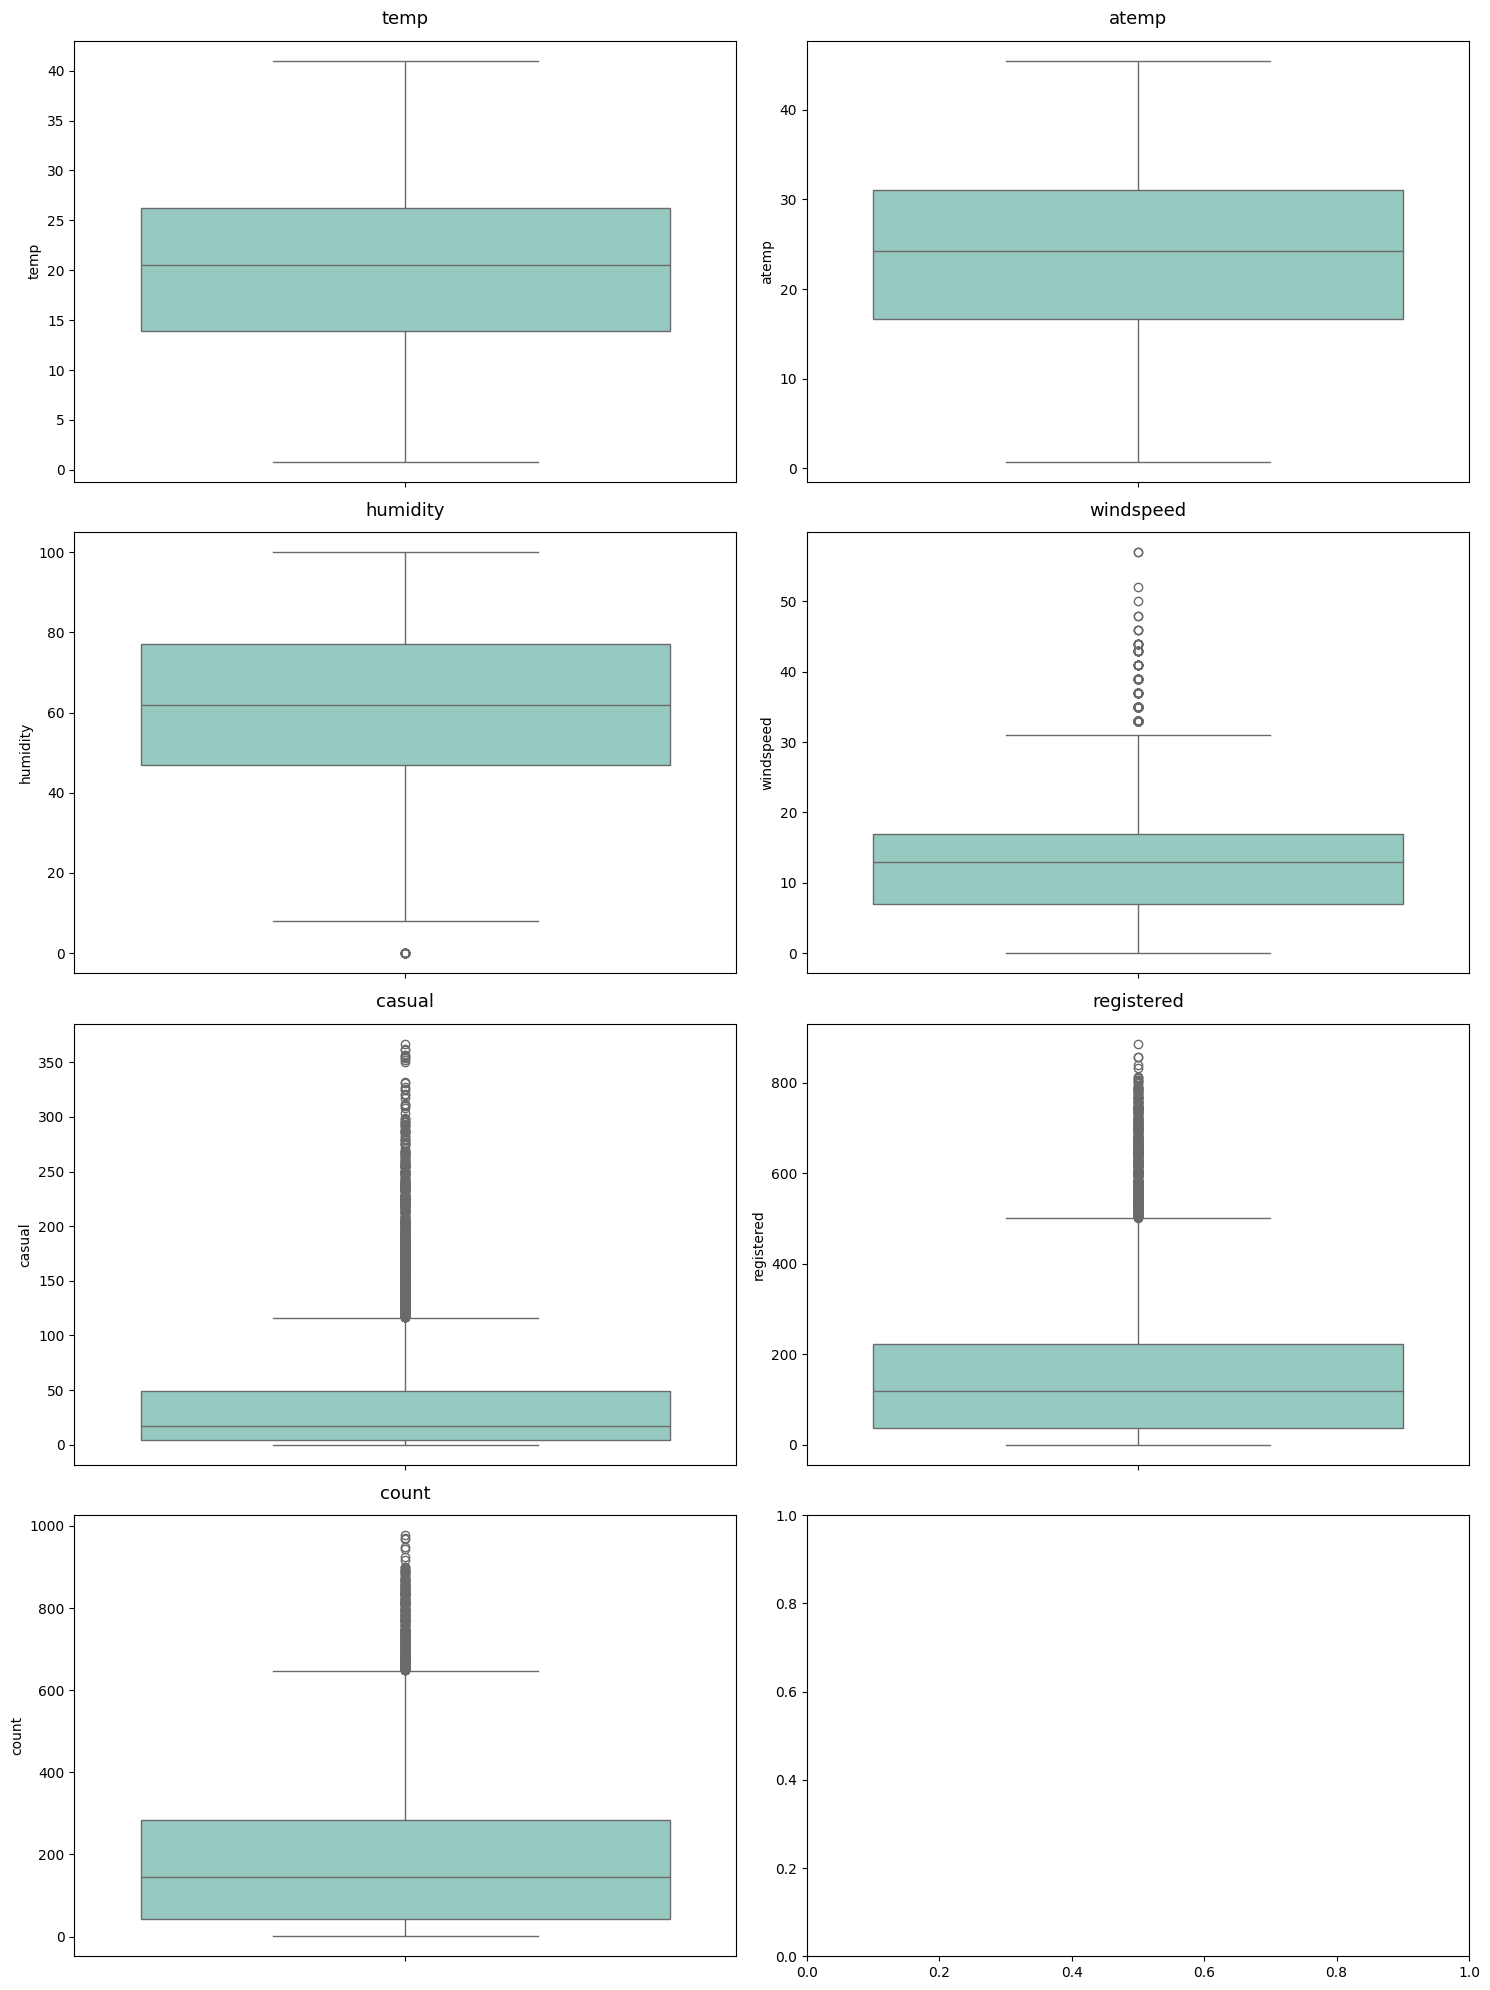

In [33]:
lst1=['temp','atemp','humidity','windspeed','casual','registered','count']
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,20))
for i,col in enumerate(lst1):
    sns.boxplot(dfs[col],palette='Set3',ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f"{col}", pad=12,fontsize=13)

plt.tight_layout()
plt.show()

**IQR Method**

In [34]:
for i in range(len(lst1)):
    data = dfs[lst1[i]].tolist()
    mini = np.min(data)
    Q1 = np.percentile(data, 25)
    Q2 = np.median(data)
    Q3 = np.percentile(data, 75)
    maxi = np.max(data)
    IQR = Q3 - Q1

    lo = Q1 - (1.5 * IQR)
    ho = Q3 + (1.5 * IQR)

    lower_outliers=[]
    upper_outliers=[]
    for k in data:
        if k < lo:
            lower_outliers.append(k)

        elif k > ho:
            upper_outliers.append(k)

    uo_per = round((len(upper_outliers)*100/dfs.shape[0]),2)
    lo_per = round((len(lower_outliers)*100/dfs.shape[0]),2)

    print()
    print(f"Outlier detection of {lst1[i]}")
    print('*'*20)
    print("Minimum:", mini)
    print("Maximum:", maxi)
    print(f'Initial Range (with outlier) : {(maxi-mini)}')
    print("IQR:",IQR)
    print(f'Final Range (without outlier) : {(ho-lo)}')
    print(f'Lower Outlier Percentage is {lo_per}%')
    print(f'Upper Outlier Percentage is {uo_per}%')
    print(f'Overall Outlier Percentage is {(lo_per+uo_per)}%')


Outlier detection of temp
********************
Minimum: 0.82
Maximum: 41.0
Initial Range (with outlier) : 40.18
IQR: 12.299999999999999
Final Range (without outlier) : 49.199999999999996
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 0.0%
Overall Outlier Percentage is 0.0%

Outlier detection of atemp
********************
Minimum: 0.76
Maximum: 45.455
Initial Range (with outlier) : 44.695
IQR: 14.395
Final Range (without outlier) : 57.580000000000005
Lower Outlier Percentage is 0.0%
Upper Outlier Percentage is 0.0%
Overall Outlier Percentage is 0.0%

Outlier detection of humidity
********************
Minimum: 0
Maximum: 100
Initial Range (with outlier) : 100
IQR: 30.0
Final Range (without outlier) : 120.0
Lower Outlier Percentage is 0.2%
Upper Outlier Percentage is 0.0%
Overall Outlier Percentage is 0.2%

Outlier detection of windspeed
********************
Minimum: 0.0
Maximum: 56.9969
Initial Range (with outlier) : 56.9969
IQR: 9.996400000000001
Final Range (without outl

# Hypothesis Testing

**Checking for the effect working day on overal rentals**

In [ ]:
dfs.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,day,year,hour
0,2011-01-01 00:00:00,spring,no,no,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,Jan,Saturday,2011,0
1,2011-01-01 01:00:00,spring,no,no,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,Jan,Saturday,2011,1
2,2011-01-01 02:00:00,spring,no,no,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,Jan,Saturday,2011,2
3,2011-01-01 03:00:00,spring,no,no,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,Jan,Saturday,2011,3
4,2011-01-01 04:00:00,spring,no,no,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,Jan,Saturday,2011,4


**Hypothsis testng on Working day**

**Null Hypothesis H(o)**: There is no change in rental behaviour depending on working day.

**Alternate Hypothesis H(a)**: There is a change in rental behaviour depending dependng on working day.


**Checks for the test and selcting the type of test**
1. Normality check and confirmation
2. Checking Homogenity of variences
3. Define the test and test statistic

In [36]:
workingday_yes = dfs[dfs['workingday']== 'yes']['count']
workingday_no = dfs[dfs['workingday']== 'no']['count']

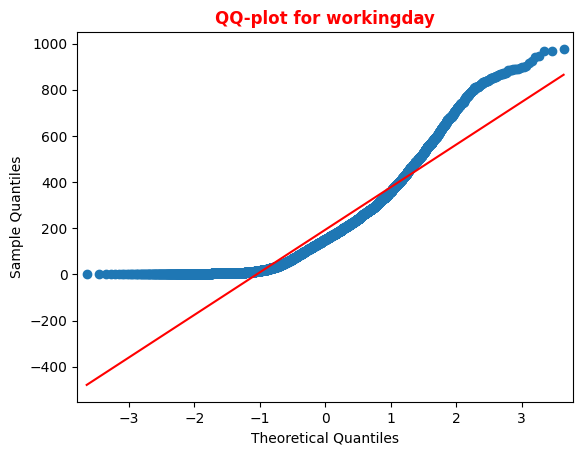

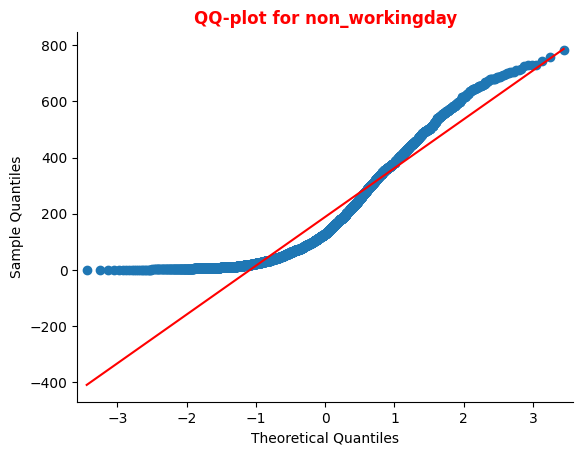

In [41]:
sm.qqplot(workingday_yes,line='s')
plt.title('QQ-plot for workingday',fontsize=12,fontweight="bold",color='r')

sm.qqplot(workingday_no,line='s')
plt.title('QQ-plot for non_workingday',fontsize=12,fontweight="bold",color='r')

sns.despine()
plt.show()

# **Shapiro test for workingday(normality check)**

**Null Hypothesis** : Ho -- Data is Gaussian

**Alternate Hypothesis** : Ha -- Data is not Gaussian

In [42]:
shapiro_stat , p_val = shapiro(workingday_yes)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

if p_val < 0.05:
    print('Data does not follow normal distribution')
else:
    print('Data follows a normal distribution')

shapiro_stat : 0.8702582120895386 , p_value : 0.0
Data does not follow normal distribution


In [43]:
shapiro_stat , p_val = shapiro(workingday_no)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

if p_val < 0.05:
    print('Data does not follow normal distribution')
else:
    print('Data follows a normal distribution')

shapiro_stat : 0.8852126598358154 , p_value : 4.203895392974451e-45
Data does not follow normal distribution


# **Levene test for variance**

**Null Hypothesis**(Ho) -  Both  has similar variance

**Alternate Hypothesis**(HA) -  Both has different variance

In [44]:
levene_stat, p_value = levene(workingday_yes,workingday_no)

print('Levene_stat : ', levene_stat)
print('p-value : ', p_value)

if p_value < 0.05:
    print('The samples do not have  Homogenous Variance -- has different variance')
else:
    print('The samples have Homogenous Variance -- has similar variance')

Levene_stat :  0.004972848886504472
p-value :  0.9437823280916695
The samples have Homogenous Variance -- has similar variance


Clearly the data is not normally distributed hence t-test cannot be applied so we got wih non parametriic tests like Mann-Whitney U rank test to check the dependency of the variables

#  **Mann-Whitney U rank test for Working day**

In [48]:
test_stat, p_value = mannwhitneyu(workingday_yes,workingday_no)

print(f'Mannwhitneyu_stat : ',test_stat)
print('P-value :',p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis")
    print('No.of bikes rented is not same for working and non-working days')
else:
    print("Failed to Reject Null Hypothesis - Accept Ho")
    print('No.of bikes rented is same for working and non-working days')

Mannwhitneyu_stat :  12868495.5
P-value : 0.9679139953914079
Failed to Reject Null Hypothesis - Accept Ho
No.of bikes rented is same for working and non-working days


**Insights from the test**
We failed to rejec the H(o) and the mean of rentals on both working and non working days is equal.

Lets see what t_test will give us.

# **T-test for Working day**

In [49]:
test_stat, p_value = ttest_ind(workingday_yes,workingday_no)

print(f'ttest_stat : ',test_stat)
print('P-value :',p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis")
    print('No.of bikes rented is not same for working and non-working days')
else:
    print("Failed to Reject Null Hypothesis - Accept Ho")
    print('No.of bikes rented is same for working and non-working days')

ttest_stat :  1.2096277376026694
P-value : 0.22644804226361348
Failed to Reject Null Hypothesis - Accept Ho
No.of bikes rented is same for working and non-working days


**Checking rentals are depending on Season**

**Null Hypothesis H(o):** Mean Rentals is same for all Season

**Alternate Hypothesis H(a):** Mean Rentals is different for different seasons

Check for normality od data and go with the required tests

In [52]:
summer = dfs[dfs['season']=='summer']['count']
winter = dfs[dfs['season']=='winter']['count']
fall = dfs[dfs['season']=='fall']['count']
spring = dfs[dfs['season']=='spring']['count']

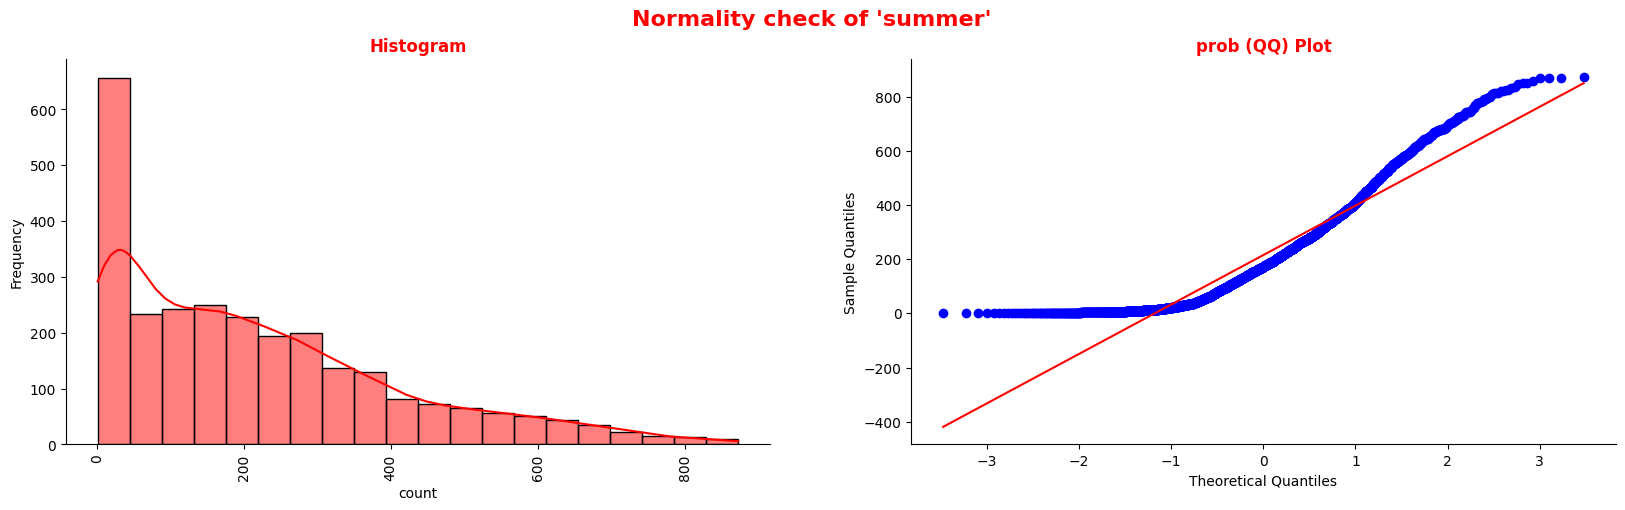

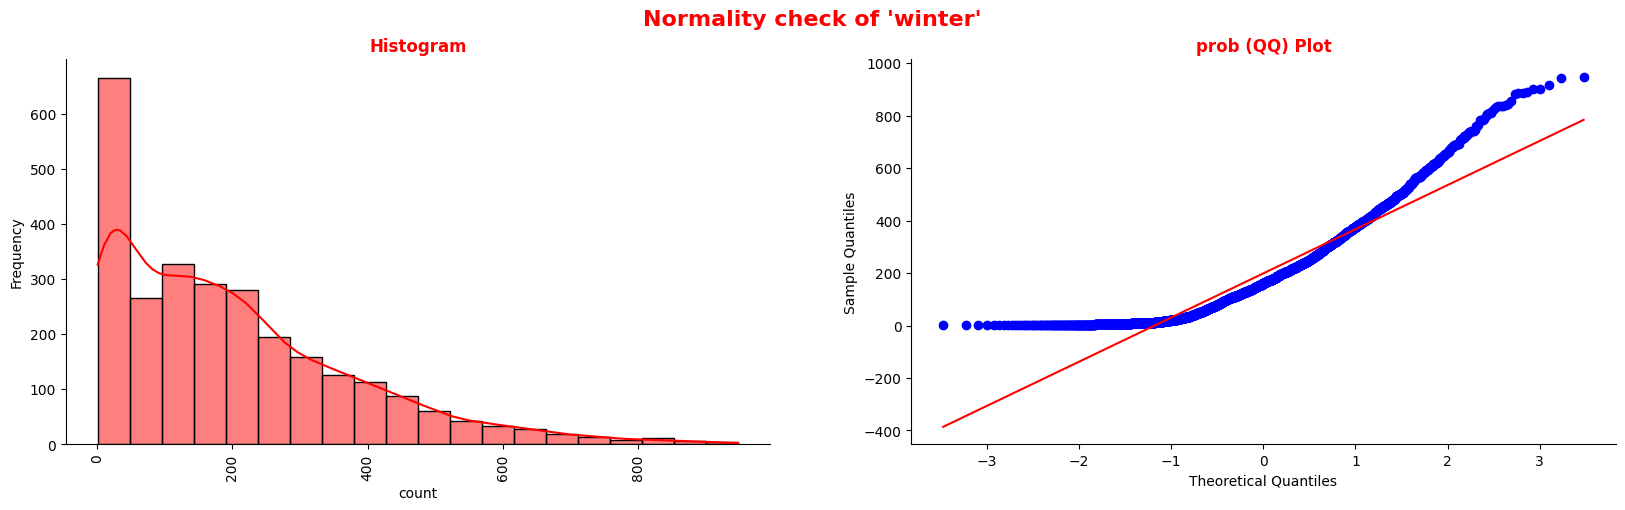

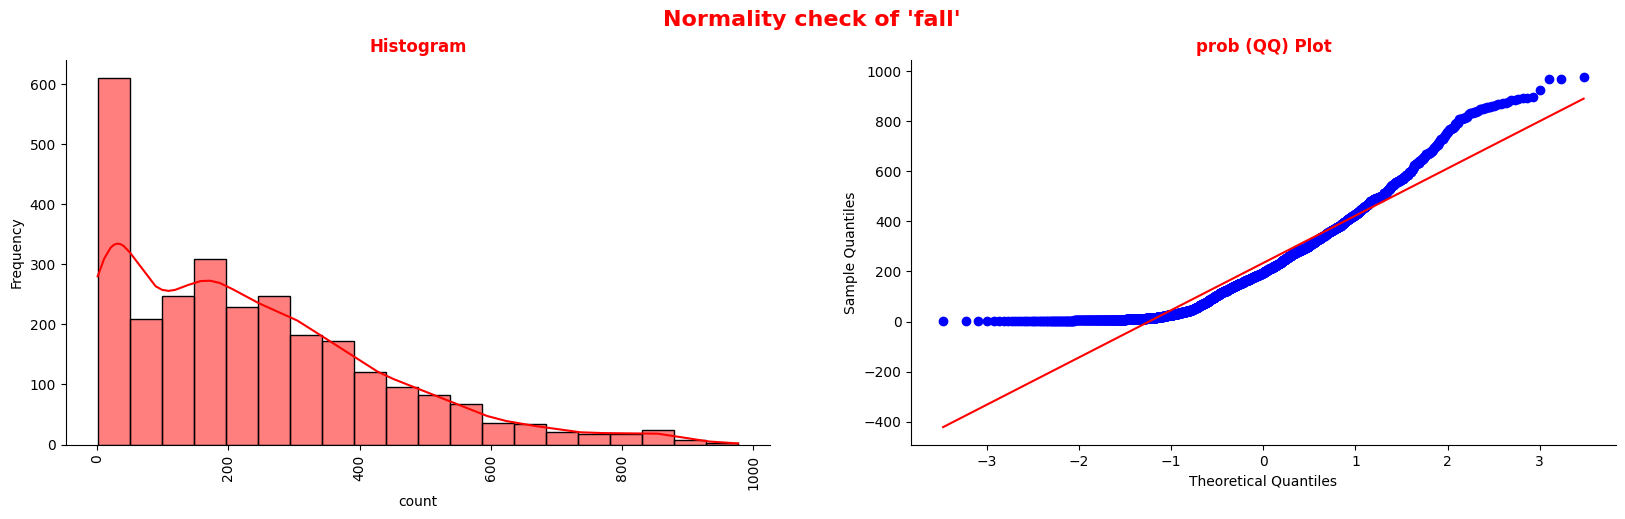

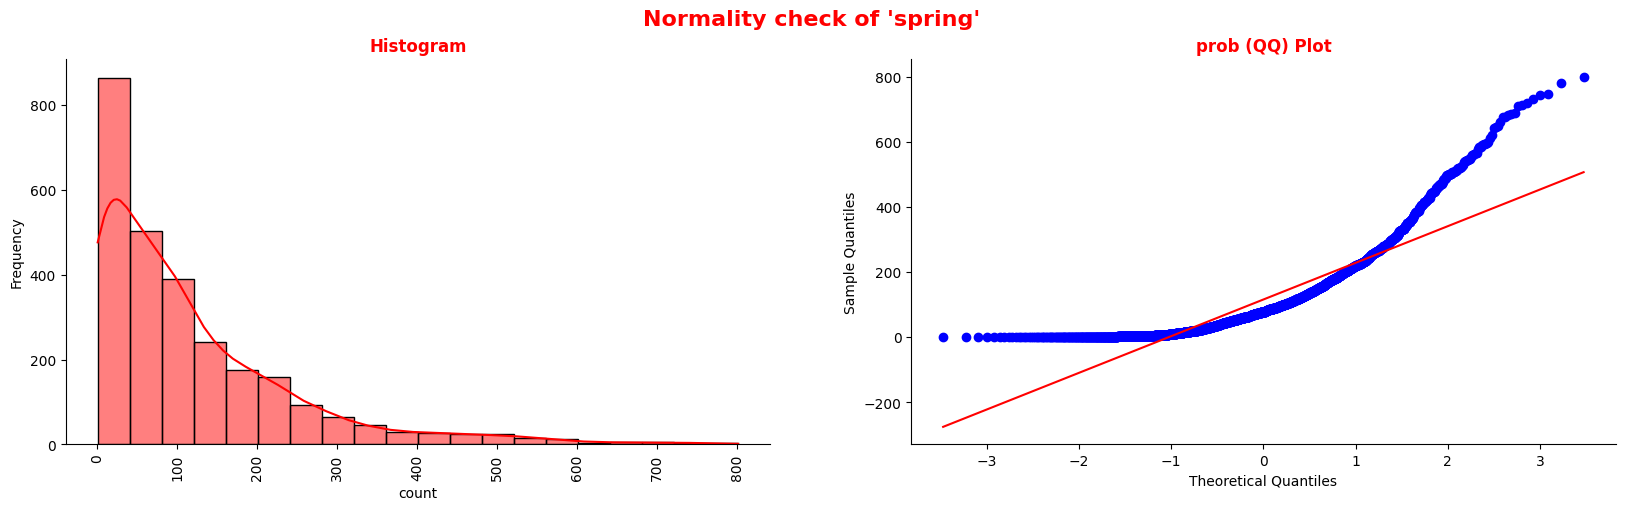

In [59]:
season_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}
a=1
for col_name,data in season_cols.items():
    plt.figure(figsize=(20,5))
    plt.suptitle(f'Normality check of \'{col_name}\' ',fontsize=16,fontweight="bold",color='r')
    plt.subplot(121)
    sns.histplot(data, bins=20,kde=True,color='red')
    plt.ylabel('Frequency')
    plt.title(f'Histogram',fontsize=12,fontweight="bold",color='r')
    plt.xticks(rotation=90)

    plt.subplot(122)
    probplot(data, dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'prob (QQ) Plot',fontsize=12,fontweight="bold",color='r')

    sns.despine()
    plt.show()

# **Shapiro-Wilk Test for season**

In [62]:
season_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}

for col_name,data in season_cols.items():
    shapiro_stat , p_val = shapiro(data)
    print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

    if p_val < 0.05:
        print(f'Data {col_name} is not Gaussian distribution')
        print()
    else:
        print(f'Data {col_name} is Gaussian distribution')
        print()


shapiro_stat : 0.900481641292572 , p_value : 6.039093315091269e-39
Data summer is not Gaussian distribution

shapiro_stat : 0.8954644799232483 , p_value : 1.1301682309549298e-39
Data winter is not Gaussian distribution

shapiro_stat : 0.9148160815238953 , p_value : 1.043458045587339e-36
Data fall is not Gaussian distribution

shapiro_stat : 0.8087388873100281 , p_value : 0.0
Data spring is not Gaussian distribution



**ANOVA requires the data to be gaussian but the above charts and Shapiro-Wilk Test suggest otherwise so go with Kruskel-Walis H Test and ANOVA and comapare the results**

# **Kruskel-Walis H Test for Season dependency**

In [64]:
alpha = 0.05
test_stat, p_value = kruskal(summer,winter,fall,spring)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
    print("The mean number of bikes rentals is different across seasons")
else:
    print('Failed to reject Null Hypothesis')
    print("The mean of bikes rentals is same for across seasons.")


Test Statistic = 699.6668548181915
p value = 2.4790083726176776e-151
Reject Null Hypothesis
The mean number of bikes rentals is different across seasons


# **ANOVA for Season**

In [70]:
test_stat, p_value = f_oneway(summer,winter,fall,spring)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
    print("The mean number of bikes rented is different across seasons")
else:
    print('Failed to reject Null Hypothesis')
    print("The mean of bikes rented is same for across seasons")

Test Statistic = 236.94671081032104
p value = 6.164843386499654e-149
Reject Null Hypothesis
The mean number of bikes rented is different across seasons


# **Check for dependency of weather on bike rentals**

**Weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


**Null Hypothesis:** The mean of bikes rented is same for across weather conditions.

**ALternate Hypothesis:** The mean number of bikes rented is different across at least two weather conditions.

Check for Normality and decide appropriate test

In [72]:
dfs['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [81]:
we_clear = dfs[dfs['weather']==1]['count']
we_partly_cloudy = dfs[dfs['weather']==2]['count']
we_rain = dfs[dfs['weather']==3]['count']
we_heavyrain = dfs[dfs['weather']==4]['count']

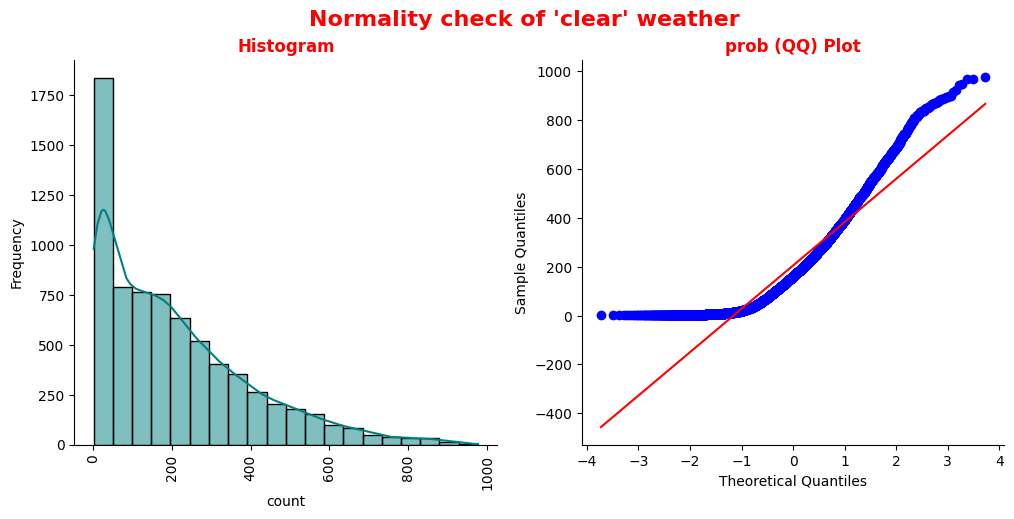

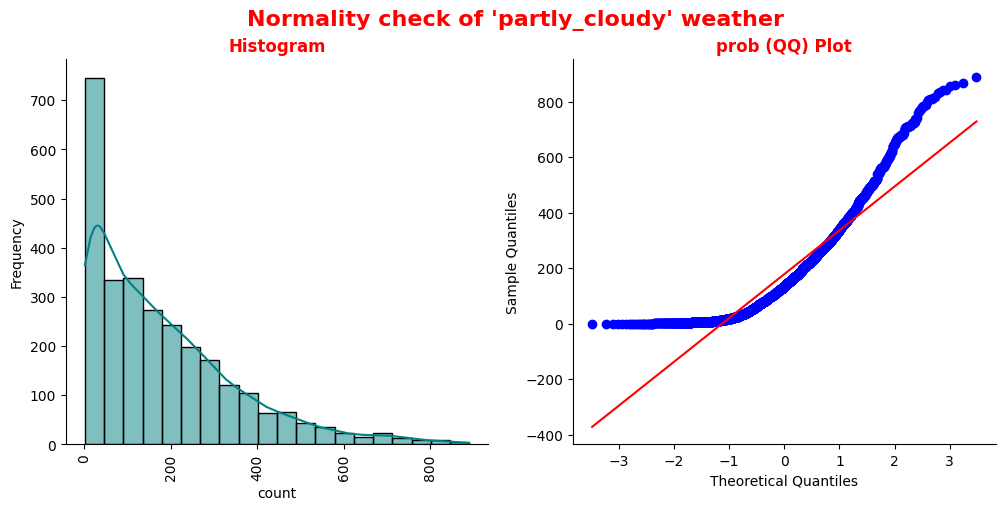

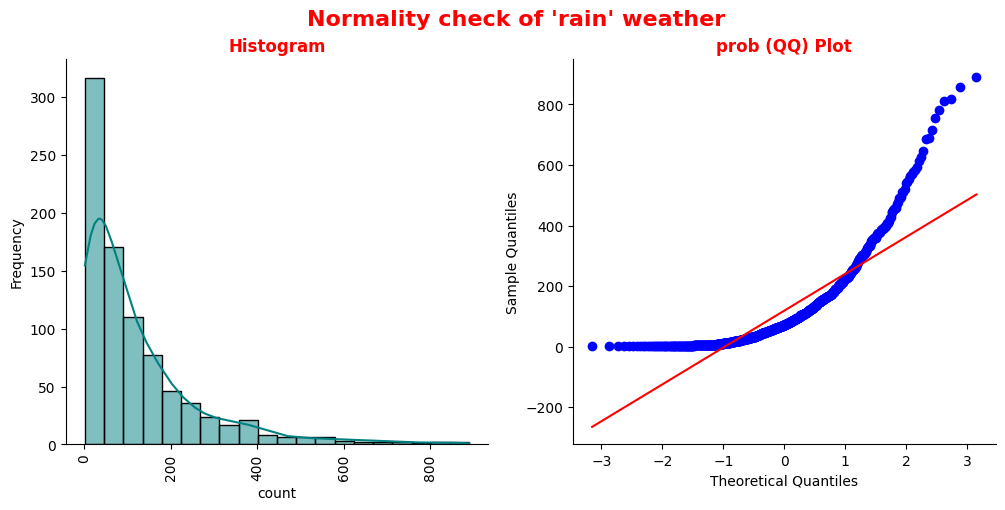

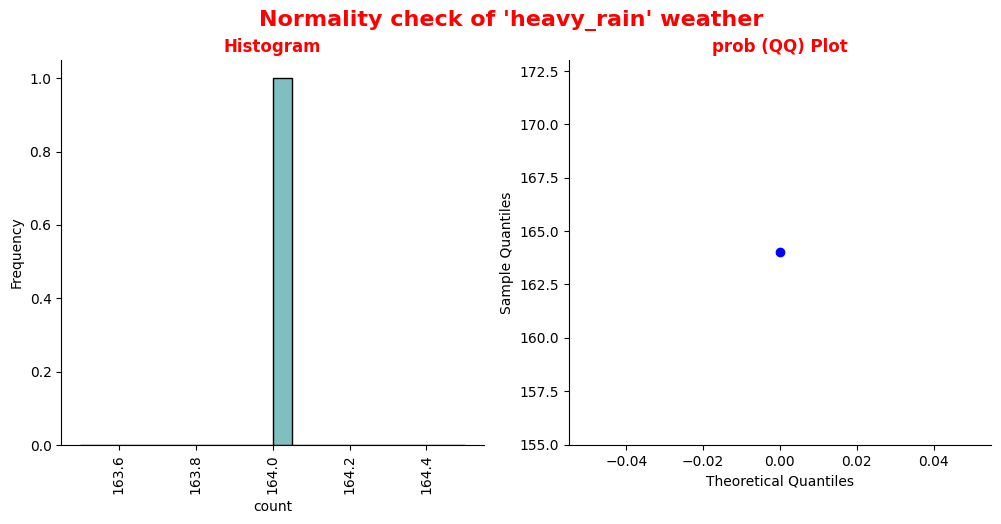

In [84]:
weather_cols = {'clear':we_clear, 'partly_cloudy':we_partly_cloudy, 'rain':we_rain,'heavy_rain':we_heavyrain}

for col_name,data in weather_cols.items():
    plt.figure(figsize=(12,5))
    plt.suptitle(f'Normality check of \'{col_name}\' weather',fontsize=16,fontweight="bold",color='r')

    plt.subplot(121)
    sns.histplot(data, bins=20,kde=True,color='teal')
    plt.ylabel('Frequency')
    plt.title(f'Histogram',fontsize=12,fontweight="bold",color='r')
    plt.xticks(rotation=90)

    plt.subplot(122)
    probplot(data, dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'prob (QQ) Plot',fontsize=12,fontweight="bold",color='r')

    sns.despine()
    plt.show()

# **Shapiro-Wilk Test for weather**

In [86]:
weather_cols = {'clear':we_clear, 'partly_cloudy':we_partly_cloudy, 'rain':we_rain}

for col_name,data in weather_cols.items():
    shapiro_stat , p_val = shapiro(data)
    print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

    if p_val < 0.05:
        print(f'Data {col_name} is not Gaussian distribution')
        print()
    else:
        print(f'Data {col_name} is Gaussian distribution')
        print()
    print('-'*125)

shapiro_stat : 0.8909230828285217 , p_value : 0.0
Data clear is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.8767687082290649 , p_value : 9.781063280987223e-43
Data partly_cloudy is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.7674332857131958 , p_value : 3.876090133422781e-33
Data rain is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------


Since bothe the chart and the Shapiro-Wilk Test reveal data is not gaussian we can go with KRUSKAL_WALIS H TEST along with ANOVA.

**Note:** we didn't include the category 4(heavyrain) because it has only one datapoint and for shapiro test it is not vald datapoint.

# **KRUSKAL_WALIS H TEST for Weather**

In [88]:
alpha = 0.05
test_stat, p_value = kruskal(we_clear,we_partly_cloudy,we_rain)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
    print("The mean number of bikes rented is different across at weather conditions")
else:
    print('Failed to reject Null Hypothesis')
    print("The mean of bikes rented is same for across weather conditions.")

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45
Reject Null Hypothesis
The mean number of bikes rented is different across at weather conditions


# **ANOVA for Weather**

In [90]:
test_stat, p_value = f_oneway(we_clear,we_partly_cloudy,we_rain)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 98.28356881946706
p value = 4.976448509904196e-43


**Insights from the test for weather**
Both Anova and KRUSKAL_WALIS H TEST for Weather has proved that the mean rentals for bikes varies dependending on weather conditions.

In [91]:
dfs.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,day,year,hour
0,2011-01-01 00:00:00,spring,no,no,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,Jan,Saturday,2011,0
1,2011-01-01 01:00:00,spring,no,no,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,Jan,Saturday,2011,1
2,2011-01-01 02:00:00,spring,no,no,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,Jan,Saturday,2011,2
3,2011-01-01 03:00:00,spring,no,no,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,Jan,Saturday,2011,3
4,2011-01-01 04:00:00,spring,no,no,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,Jan,Saturday,2011,4


# **Checking for dependency of rentals on holidays**

In [92]:
holiday_yes = dfs[dfs['holiday']== 'yes']['count']
holiday_no = dfs[dfs['holiday']== 'no']['count']

**Null Hypothesis:** Mean rentals are same irrespective of holidays

**Alternate Hypothesis:** Mean rentals differ with Holidays

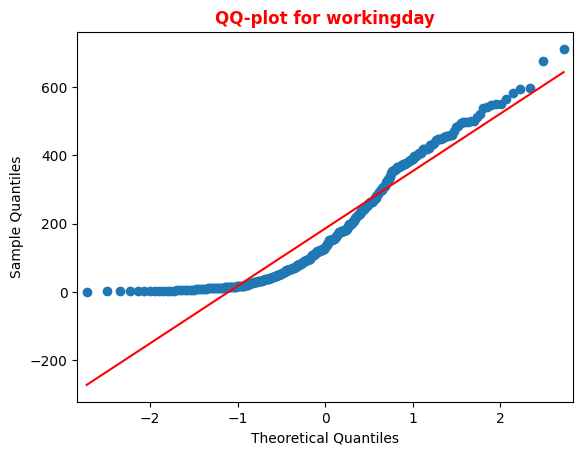

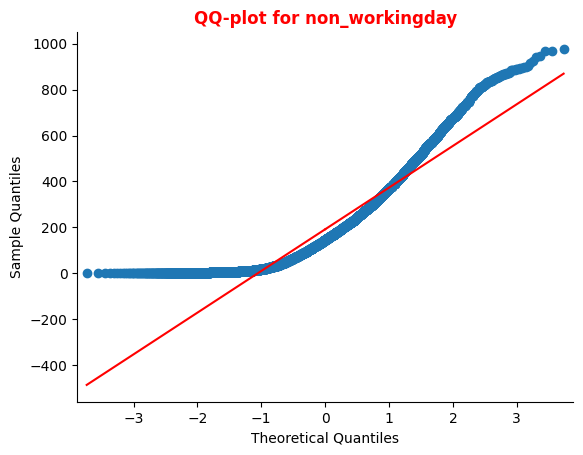

In [93]:
sm.qqplot(holiday_yes,line='s')
plt.title('QQ-plot for workingday',fontsize=12,fontweight="bold",color='r')

sm.qqplot(holiday_no,line='s')
plt.title('QQ-plot for non_workingday',fontsize=12,fontweight="bold",color='r')

sns.despine()
plt.show()

In [94]:
shapiro_stat , p_val = shapiro(holiday_yes)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

if p_val < 0.05:
    print('Data does not follow normal distribution')
else:
    print('Data follows a normal distribution')

shapiro_stat : 0.8702582120895386 , p_value : 0.0
Data does not follow normal distribution


In [96]:
shapiro_stat , p_val = shapiro(holiday_no)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

if p_val < 0.05:
    print('Data does not follow normal distribution')
else:
    print('Data follows a normal distribution')

shapiro_stat : 0.8775045871734619 , p_value : 0.0
Data does not follow normal distribution


Both the tests reveal data is not normally distributed so lets go with Mann-Whitney U rank test

# **Mann-Whitney U rank test for Holidays**

In [97]:
test_stat, p_value = mannwhitneyu(holiday_yes,holiday_no)

print(f'Mannwhitneyu_stat : ',test_stat)
print('P-value :',p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis")
    print('No.of bikes rented is not same for holiday and non-working days')
else:
    print("Failed to Reject Null Hypothesis - Accept Ho")
    print('No.of bikes rented is same for holiday and non-holiday days')

Mannwhitneyu_stat :  1635100.0
P-value : 0.8646355678725027
Failed to Reject Null Hypothesis - Accept Ho
No.of bikes rented is same for holiday and non-holiday days


# **Chi-square test for checking dependency of season and weather**

**Null Hypothesis:** Season and weather are independent

**Alternate Hypothesis:** Season and weather are dependent

In [104]:
stata,pval,dof,exp_freq=chi2_contingency(pd.crosstab(dfs['season'],dfs['weather']))
if pval < 0.05:
    print("Reject Null Hypothesis")
    print('Season and weather and dependent')
else:
    print("Failed to Reject Null Hypothesis - Accept Ho")
    print('Season and weather are independent')

Reject Null Hypothesis
Season and weather and dependent


The above stat reveals season and weather are dependent

# **Bussiness Insights:**

1.Less rentals on holidays and weekends, with a demand increase on non-working days. However, the overall count on working and non-holiday days are similar.

2.Casual riders dominate on weekends, while registered users are more active on working days.

3.The hourly rental count shows impressive annual growth from 2011 to 2012.

4.Clear weather is associated with the highest bike rental counts, whereas rentals sharply decrease in rain, thunderstorm, snow, or fog.

5.Maximum bike rentals occur during summer, while the minimum is observed in winter.

6.Approximately 19% of users are casual, and 81% are registered.

7.Temperature and feeling temperature exhibit a strong positive correlation.

8.Registered Users and Total_riders exhibit a strong positive correlation as well.

9.ChiSquare confirms that the Weather is dependent on the Seasons.

10.ANOVA tests confirm statistically significant impacts of seasons and weather on bike rentals.

11.Humidity, windspeed, temperature and weather are correlated with season and impacts the count of cycles rented.

# **Recommendations**

1.Leverage seasonal patterns by implementing targeted marketing during peak seasons (spring and summer).

2.Introduce seasonal incentives and exclusive packages to drive higher demand.

3.Optimize resource utilization by implementing dynamic time-based pricing.

4.Adjust rental rates to encourage bike usage during off-peak hours, enhancing accessibility.

5.Fine-tune inventory levels based on monthly demand patterns.

6.Avoid overstocking during low-demand months and ensure sufficient bikes during peak periods.

7.Conduct thorough seasonal bike maintenance to prevent breakdowns.

8.Ensure optimal bike performance, enhancing customer satisfaction.

9.Collect more data on extreme weather conditions to understand user behavior.

10.Consider specialized bike models or safety measures for different weather scenarios.

# **Summary**

 The influential factors influencing bike rentals are the season and weather, over the impact of working and non-working days. To optimize and increase sale operations, emphasis should be placed on expanding bike parking zones during months excluding winter (Nov-Feb) and provide better facilities . Considering the decline in bike rentals during winter, exploring alternatives like electric car rentals for comfortable cold-weather commuting is recommended.